In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load raw reviews
df = pd.read_csv('../raw_reviews.csv')  # I

# Preview
df.head()


[nltk_data] Downloading package stopwords to C:\Users\Dawa
[nltk_data]     Cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,rating,date,bank,source
0,very good app,1,2025-06-09,Commercial Bank of Ethiopia,Google Play
1,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
2,not functional,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
3,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play
4,yetemeta,1,2025-06-03,Commercial Bank of Ethiopia,Google Play


In [4]:
# Drop duplicates and rows with missing critical data
df.drop_duplicates(inplace=True)
df.dropna(subset=['review', 'rating', 'date'], inplace=True)

# Standardize the date format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

# Add metadata if not present
df['source'] = 'Google Play'
if 'bank' not in df.columns:
    df['bank'] = 'UNKNOWN'


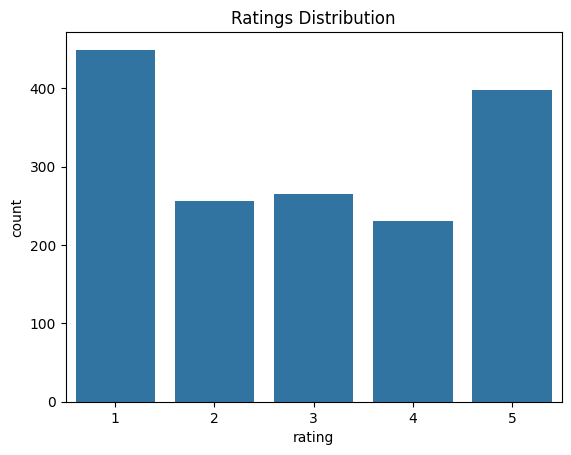

In [5]:
sns.countplot(x='rating', data=df)
plt.title('Ratings Distribution')
plt.show()


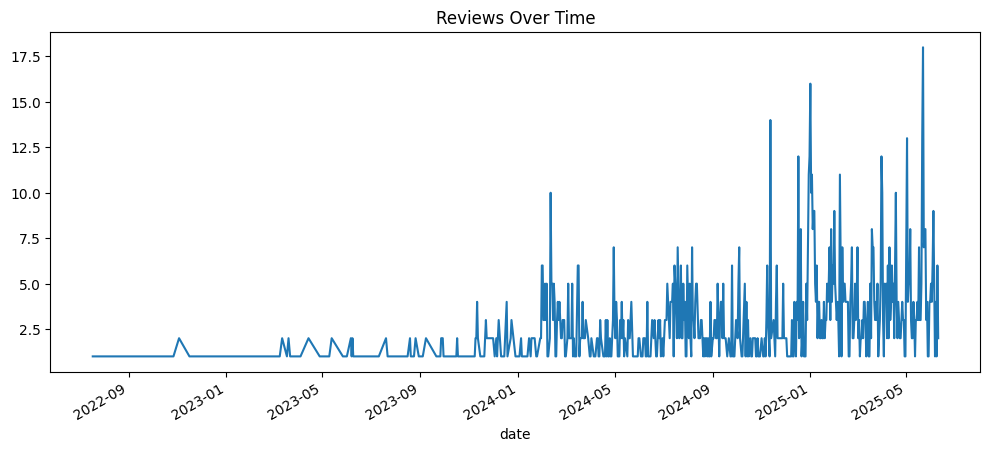

In [6]:
df['date'] = pd.to_datetime(df['date'])
reviews_per_day = df.groupby('date').size()
reviews_per_day.plot(title='Reviews Over Time', figsize=(12,5))
plt.show()


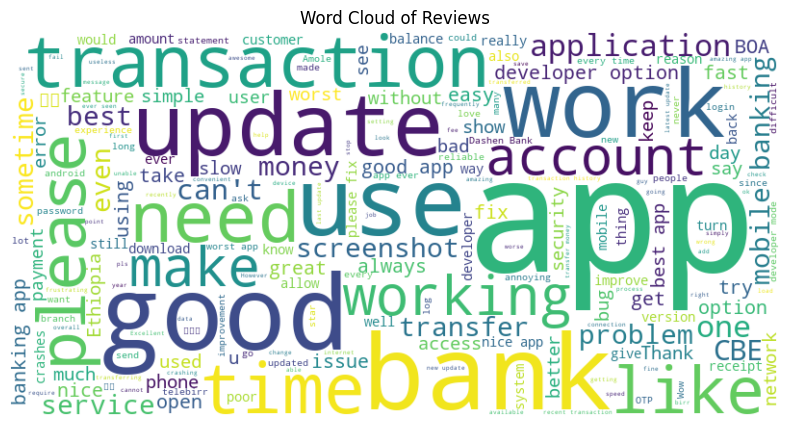

In [7]:
text = ' '.join(df['review'].dropna())
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


In [8]:
df.to_csv('../cleaned_reviews.csv', index=False)
